# GTBIF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_gtbif = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/gtbif.csv')
df_gtbif['Date'] = pd.to_datetime(df_gtbif['Date'])
df_gtbif = df_gtbif.set_index('Date')
df_gtbif = df_gtbif.rename(columns={'Open':'gtbif_Open', 'High':'gtbif_High', 'Low':'gtbif_Low', 'Close':'gtbif_Close', 'Volume':'gtbif_Volume'})
df_gtbif = df_gtbif.drop('Adj Close', axis=1)
df_gtbif['gtbif_prev_close'] = df_gtbif['gtbif_Close'].shift(1)
df_gtbif['gtbif_next_close'] = df_gtbif['gtbif_Close'].shift(-1)
df_gtbif['gtbif_diff'] = df_gtbif['gtbif_Close'].diff()
df_gtbif['gtbif_%change'] = df_gtbif['gtbif_Close'].pct_change()
df_gtbif['gtbif_5day_avg_close'] = df_gtbif['gtbif_Close'].rolling(5).mean()
df_gtbif['gtbif_5day_avg_diff'] = df_gtbif['gtbif_diff'].rolling(5).mean()
df_gtbif['gtbif_10day_avg_close'] = df_gtbif['gtbif_Close'].rolling(10).mean()
df_gtbif['gtbif_10day_avg_diff'] = df_gtbif['gtbif_diff'].rolling(10).mean()

In [4]:
df_gtbif

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000               NaN      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff  
Date                              
2018-06-14                   NaN  
2018-06-15                   NaN  
2018-06-18                   NaN  
2018-06-19                   NaN  
2018-06-20                   NaN  
...                          ...  
2022-05-17                -0.085  
2022-05-18                -0.115  
2022-05-19                 0.022  
2022-05-20                -0.013  
2022-05-23                 0.071  

[993 rows x 13 columns]

In [5]:
cut = df_gtbif.index.min()
cut

Timestamp('2018-06-14 00:00:00')

Text(0.5, 0, 'GTBIF Close')

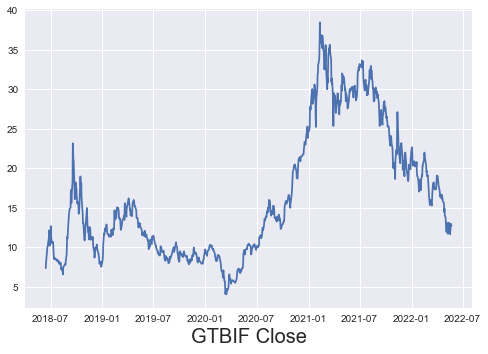

In [6]:
plt.plot(df_gtbif['gtbif_Close'])
plt.xlabel('GTBIF Close', fontsize=20)

## GTBIF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_gtbif, df_dow, on='Date', how='left')
df0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000               NaN      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                   NaN   25254.65   25332.50  25138.60    25175.31   
2018-06-15                   NaN   25116.71   25130.82  24894.38    25090.48   
2018-06-18                   NaN   24944.28   25003.10  24825.77    24987.47   
2018-06-19                   NaN   24763.59   24763.59  24567.75    24700.21   
2018-06-20                   NaN   24771.17   24804.76  24628.39    24657.80   
...                          ...        ...        ...       ...         ...   
2022-05-17                -0.085   32427.00   32689.14  32308.15    32654.59   
2022-05-18                -0.115   32468.67   32468.67  31393.95    31490.07   
2022-05-19                 0.022   31262.62   31569.13  31016.41    31253.13   
2022-05-20                -0.013   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                  True      False      False     False       False   
2018-06-15                  True      False      False     False       False   
2018-06-18                  True      False      False     False       False   
2018-06-19                  True      False      False     False       False   
2018-06-20                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                   0.0   25254.65   25332.50  25138.60    25175.31   
2018-06-15                   0.0   25116.71   25130.82  24894.38    25090.48   
2018-06-18                   0.0   24944.28   25003.10  24825.77    24987.47   
2018-06-19                   0.0   24763.59   24763.59  24567.75    24700.21   
2018-06-20                   0.0   24771.17   24804.76  24628.39    24657.80   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-06-14  341117350.0         25201.20         25090.48     -25.89   
2018-06-15  659457895.0         25175.31         24987.47     -84.83   
2018-06-18  336974005.0         25090.48         24700.21    -103.01   
2018-06-19  376415787.0         24987.47         24657.80    -287.26   
2018-06-20  359445573.0         24700.21         24461.70     -42.41   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-06-14     -0.001027            25267.216             -13.220   
2018-06-15     -0.003370            25222.006             -45.210   
2018-06-18     -0.004106            25155.038             -66.968   
2018-06-19     -0.011496            25030.934            -124.104   
2018-06-20     -0.001717            24922.254            -108.680   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-06-14             25097.276               75.947  
2018-06-15             25142.803               45.527  
2018-06-18             25160.181               17.378  
2018-06-19             25150.204               -9.977  
2018-06-20             25101.345              -48.859

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000             0.000      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                0.000                  0.000   
2018-06-15                0.0000                0.000                  0.000   
2018-06-18                0.0000                0.000                  0.000   
2018-06-19                0.0000                0.000                  0.000   
2018-06-20                8.9026                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                 0.000   25254.65   25332.50  25138.60    25175.31   
2018-06-15                 0.000   25116.71   25130.82  24894.38    25090.48   
2018-06-18                 0.000   24944.28   25003.10  24825.77    24987.47   
2018-06-19                 0.000   24763.59   24763.59  24567.75    24700.21   
2018-06-20                 0.000   24771.17   24804.76  24628.39    24657.80   
...                          ...        ...        ...       ...         ...   
2022-05-17                -0.085   32427.00   32689.14  32308.15    32654.59   
2022-05-18                -0.115   32468.67   32468.67  31393.95    31490.07   
2022-05-19                 0.022   31262.62   31569.13  31016.41    31253.13   
2022-05-20                -0.013   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   
2018-06-19                  0.0                    0.0                   0.0   
2018-06-20                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-06-14   25254.65   25332.50  25138.60    25175.31  341117350.0   
2018-06-15   25116.71   25130.82  24894.38    25090.48  659457895.0   
2018-06-18   24944.28   25003.10  24825.77    24987.47  336974005.0   
2018-06-19   24763.59   24763.59  24567.75    24700.21  376415787.0   
2018-06-20   24771.17   24804.76  24628.39    24657.80  359445573.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-06-14         25201.20         25090.48     -25.89     -0.001027   
2018-06-15         25175.31         24987.47     -84.83     -0.003370   
2018-06-18         25090.48         24700.21    -103.01     -0.004106   
2018-06-19         24987.47         24657.80    -287.26     -0.011496   
2018-06-20         24700.21         24461.70     -42.41     -0.001717   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-06-14            25267.216             -13.220             25097.276   
2018-06-15            25222.006             -45.210             25142.803   
2018-06-18            25155.038             -66.968             25160.181   
2018-06-19            25030.934            -124.104             25150.204   
2018-06-20            24922.254            -108.680             25101.345   

            djix_10day_avg_diff  gtbif_Open_b  gtbif_High_b  gtbif_Low_b  \
Date                                                                       
2018-06-14               75.947         False         False        False   
2018-06-15               45.527         False         False        False   
2018-06-18               17.378         False         False        False   
2018-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(992, 56)

In [18]:
n = int(len(df0) * 0.9)
n

892

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

892
100


In [21]:
X_train0 = train0.drop('gtbif_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-06-14                    0.0                   0.0   25254.65   25332.50   
2018-06-15                    0.0                   0.0   25116.71   25130.82   
2018-06-18                    0.0                   0.0   24944.28   25003.10   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-06-14  25138.60    25175.31  341117350.0         25201.20   
2018-06-15  24894.38    25090.48  659457895.0         25175.31   
2018-06-18  24825.77    24987.47  336974005.0         25090.48   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-06-14         25090.48     -25.89     -0.001027            25267.216   
2018-06-15         24987.47     -84.83     -0.003370            25222.006   
2018-06-18         24700.21    -103.01     -0.004106            25155.038   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-06-14             -13.220             25097.276               75.947   
2018-06-15             -45.210             25142.803               45.527   
2018-06-18             -66.968             25160.181               17.378   

            gtbif_Open_b  gtbif_High_b  gtbif_Low_b  gtbif_Close_b  \
Date                                                                 
2018-06-14         False         False        False          False   
2018-06-15         False         False        False          False   
2018-06-18         False         False        False          False   

            gtbif_Volume_b  gtbif_prev_close_b  gtbif_next_close_b  \
Date                                                                 
2018-06-14           False                True               False   
2018-06-15           False               False               False   
2018-06-18           False               False               False   

            gtbif_diff_b  gtbif_%change_b  gtbif_5day_avg_close_b  \
Date                                                                
2018-06-14          True             True                    True   
2018-06-15         False            False                    True   
2018-06-18         False            False                    True   

            gtbif_5day_avg_diff_b  gtbif_10day_avg_close_b  \
Date                                                         
2018-06-14                   True                     True   
2018-06-15                   True                     True   
2018-06-18                   True                     True   

            gtbif_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(892, 55)

In [23]:
y_train0 = train0['gtbif_next_close']
y_train0.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('gtbif_next_close', axis=1)
y_test0 = test0['gtbif_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-29     12   29  2021        4       20.75   21.330000  19.410000   
2021-12-30     12   30  2021        4       21.25   22.207001  20.110001   
2021-12-31     12   31  2021        4       21.41   22.987000  21.020000   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-29        21.25        452300         19.889999    1.360001   
2021-12-30        21.42        383800         21.250000    0.170000   
2021-12-31        22.16        313900         21.420000    0.740000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-29       0.068376                20.308                0.536   
2021-12-30       0.008000                20.674                0.366   
2021-12-31       0.034547                21.012                0.338   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-12-29                 19.708                 0.127   36421.14   36571.55   
2021-12-30                 19.872                 0.164   36522.48   36679.44   
2021-12-31                 20.147                 0.275   36385.85   36484.94   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-12-29  36396.19    36488.63  251970628.0         36398.21   
2021-12-30  36372.13    36398.08  241218115.0         36488.63   
2021-12-31  36303.97    36338.30  257462417.0         36398.08   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-12-29         36398.08      90.42      0.002484            36178.734   
2021-12-30         36338.30     -90.55     -0.002482            36307.572   
2021-12-31         36585.06     -59.78     -0.001642            36385.120   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-12-29             199.186             35850.904               94.445   
2021-12-30             128.838             35897.969               47.065   
2021-12-31              77.548             35942.035               44.066   

            gtbif_Open_b  gtbif_High_b  gtbif_Low_b  gtbif_Close_b  \
Date                                                                 
2021-12-29         False         False        False          False   
2021-12-30         False         False        False          False   
2021-12-31         False         False        False          False   

            gtbif_Volume_b  gtbif_prev_close_b  gtbif_next_close_b  \
Date                                                                 
2021-12-29           False               False               False   
2021-12-30           False               False               False   
2021-12-31           False               False               False   

            gtbif_diff_b  gtbif_%change_b  gtbif_5day_avg_close_b  \
Date                                                                
2021-12-29         False            False                   False   
2021-12-30         False            False                   False   
2021-12-31         False            False                   False   

            gtbif_5day_avg_diff_b  gtbif_10day_avg_close_b  \
Date                                                         
2021-12-29                  False                    False   
2021-12-30                  False                    False   
2021-12-31                  False                    False   

            gtbif_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(100, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([21.17445249, 21.25552512, 22.19015926, 22.73457551, 21.06129035])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.5647138912271713


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.4549821000900051


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['gtbif_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['gtbif_next_close'])

In [35]:
y_test0['gtbif_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              12.962973
2022-05-17             11.67              11.697893
2022-05-18             12.17              11.624466
2022-05-19             13.00              12.283862
2022-05-20             12.75              13.388784

In [37]:
hyper_table.append(dict(stock='gtbif', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['gtbif_next_close'][-1],
                        predicted_price=y_test0['gtbif_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

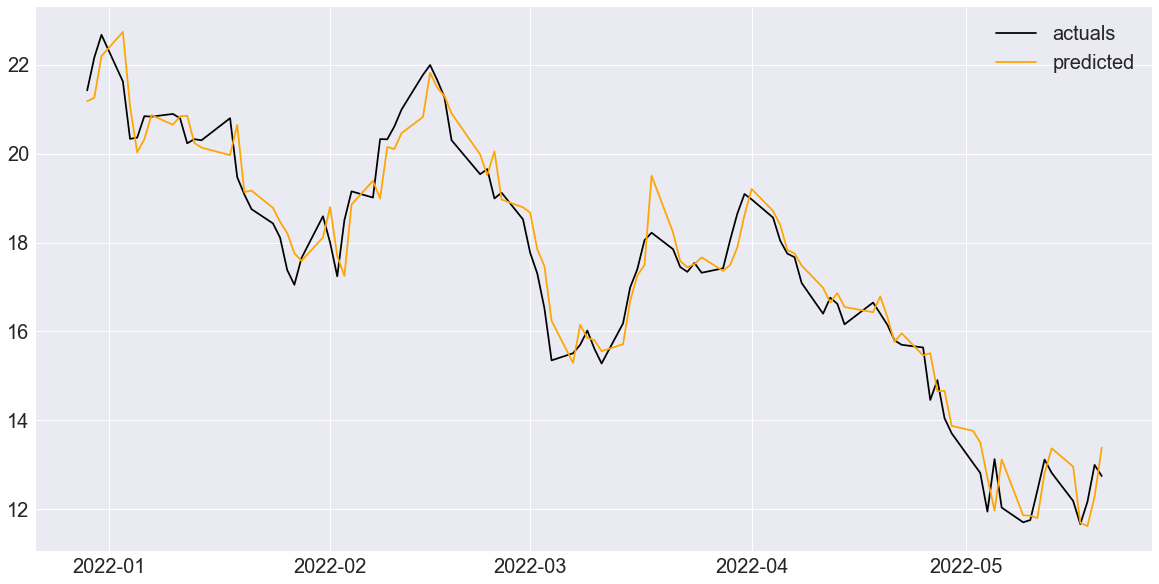

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['gtbif_next_close'], color='black')
ax.plot(y_test0['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## GTBIF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_gtbif, df_etfs, on='Date', how='left')
df1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000               NaN      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   NaN  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   NaN  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   NaN  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   NaN  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   NaN  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.085   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.115   7.940000   8.030000   7.605000   7.620000   
2022-05-19                 0.022   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.013   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            gtbif_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-06-14                  True    False    False   False     False   
2018-06-15                  True    False    False   False     False   
2018-06-18                  True    False    False   False     False   
2018-06-19                  True    False    False   False     False   
2018-06-20                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   0.0  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   0.0  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   0.0  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   0.0  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   0.0  31.000000  31.000000  30.318001  30.920000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-06-14     195500      30.299999      29.990000 -0.090000   -0.002970   
2018-06-15     167900      30.209999      30.059999 -0.219999   -0.007282   
2018-06-18      79500      29.990000      30.209999  0.069999    0.002334   
2018-06-19     147400      30.059999      30.920000  0.150000    0.004990   
2018-06-20     262700      30.209999      31.719999  0.710001    0.023502   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-06-14          30.697999            -0.312           30.832999   
2018-06-15          30.395999            -0.302           30.877000   
2018-06-18          30.197999            -0.198           30.868000   
2018-06-19          30.153999            -0.044           30.777999   
2018-06-20          30.277999             0.124           30.643999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-06-14              0.040        0.0        0.0       0.0         0.0   
2018-06-15              0.044        0.0        0.0       0.0         0.0   
2018-06-18             -0.009        0.0        0.0       0.0         0.0   
2018-06-19             -0.090        0.0        0.0       0.0         0.0   
2018-06-20             -0.134        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-06-14          0.0              0.0              0.0        0.0   
2018-06-15          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000             0.000      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                0.000                  0.000   
2018-06-15                0.0000                0.000                  0.000   
2018-06-18                0.0000                0.000                  0.000   
2018-06-19                0.0000                0.000                  0.000   
2018-06-20                8.9026                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                 0.000  30.379999  30.580000  30.051001  30.209999   
2018-06-15                 0.000  30.010000  30.330000  29.700001  29.990000   
2018-06-18                 0.000  29.950001  30.139999  29.761999  30.059999   
2018-06-19                 0.000  29.920000  30.389999  29.830000  30.209999   
2018-06-20                 0.000  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.085   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.115   7.940000   8.030000   7.605000   7.620000   
2022-05-19                 0.022   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.013   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2      12.690      13.160     12.190   
2022-05-18      5   18  2022        2      11.750      12.350     11.300   
2022-05-19      5   19  2022        2      11.274      12.182     11.274   
2022-05-20      5   20  2022        2      12.250      13.000     11.600   
2022-05-23      5   23  2022        2      12.830      13.140     12.500   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   
...                 ...           ...               ...               ...   
2022-05-17       12.190        282300            12.820            11.670   
2022-05-18       11.670        343200            12.190            12.170   
2022-05-19       12.170        190600            11.670            13.000   
2022-05-20       13.000        207300            12.170            12.750   
2022-05-23       12.750        121800            13.000             0.000   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   
...                ...            ...                   ...   
2022-05-17      -0.630      -0.049142               12.4640   
2022-05-18      -0.520      -0.042658               12.4460   
2022-05-19       0.500       0.042845               12.3940   
2022-05-20       0.830       0.068200               12.3700   
2022-05-23      -0.250      -0.019231               12.3560   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14                0.000                  0.000                 0.000   
2018-06-15                0.000                  0.000                 0.000   
2018-06-18                0.000                  0.000                 0.000   
2018-06-19                0.000                  0.000                 0.000   
2018-06-20                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-17                0.096                 12.397                -0.085   
2022-05-18               -0.018                 12.282                -0.115   
2022-05-19               -0.052                 12.304                 0.022   
2022-05-20               -0.024                 12.291                -0.013   
2022-05-23               -0.014                 12.362                 0.071   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-06-14  30.379999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

892

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

892
100


In [52]:
X_train1 = train1.drop('gtbif_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-06-14                    0.0                   0.0  30.379999  30.580000   
2018-06-15                    0.0                   0.0  30.010000  30.330000   
2018-06-18                    0.0                   0.0  29.950001  30.139999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-06-14  30.051001  30.209999     195500      30.299999      29.990000   
2018-06-15  29.700001  29.990000     167900      30.209999      30.059999   
2018-06-18  29.761999  30.059999      79500      29.990000      30.209999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-06-14 -0.090000   -0.002970          30.697999            -0.312   
2018-06-15 -0.219999   -0.007282          30.395999            -0.302   
2018-06-18  0.069999    0.002334          30.197999            -0.198   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-06-14           30.832999              0.040        0.0        0.0   
2018-06-15           30.877000              0.044        0.0        0.0   
2018-06-18           30.868000             -0.009        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-06-14       0.0         0.0          0.0              0.0   
2018-06-15       0.0         0.0          0.0              0.0   
2018-06-18       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-06-14              0.0        0.0           0.0                  0.0   
2018-06-15              0.0        0.0           0.0                  0.0   
2018-06-18              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-06-14                 0.0                   0.0                  0.0   
2018-06-15                 0.0                   0.0                  0.0   
2018-06-18                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-06-14        0.0        0.0       0.0         0.0          0.0   
2018-06-15        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(892, 159)

In [54]:
y_train1 = train1['gtbif_next_close']
y_train1.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('gtbif_next_close', axis=1)
y_test1 = test1['gtbif_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-29     12   29  2021        4       20.75   21.330000  19.410000   
2021-12-30     12   30  2021        4       21.25   22.207001  20.110001   
2021-12-31     12   31  2021        4       21.41   22.987000  21.020000   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-29        21.25        452300         19.889999    1.360001   
2021-12-30        21.42        383800         21.250000    0.170000   
2021-12-31        22.16        313900         21.420000    0.740000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-29       0.068376                20.308                0.536   
2021-12-30       0.008000                20.674                0.366   
2021-12-31       0.034547                21.012                0.338   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-29                 19.708                 0.127    11.25    11.34   
2021-12-30                 19.872                 0.164    11.08    11.45   
2021-12-31                 20.147                 0.275    11.13    11.38   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-29   11.04     11.05    1646800          11.28          11.21   
2021-12-30   11.06     11.21    1813000          11.05          11.08   
2021-12-31   11.07     11.08    1386300          11.21          11.43   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-29    -0.23   -0.020390             11.434            -0.088   
2021-12-30     0.16    0.014480             11.386            -0.048   
2021-12-31    -0.13   -0.011597             11.246            -0.140   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-29              11.374             -0.015  24.799999  25.190001   
2021-12-30              11.365             -0.009  25.010000  25.760000   
2021-12-31              11.351             -0.014  25.500000  25.650000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-29  24.219999   25.040001    1932500.0        24.700001   
2021-12-30  24.990000   25.469999    1395900.0        25.040001   
2021-12-31  25.139999   25.590000    1376000.0        25.469999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-29        25.469999   0.340000      0.013765            24.990001   
2021-12-30        25.590000   0.429998      0.017172            25.172001   
2021-12-31        25.790001   0.120001      0.004711            25.218000   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-29               0.286             24.457001                0.062   
2021-12-30               0.182             24.551000                0.094   
2021-12-31               0.046             24.699000                0.148   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-29      12.80      12.94    12.690       12.88     347000.0   
2021-12-30      12.84      13.20    12.804       12.99     180000.0   
2021-12-31      13.08      13.14 

In [58]:
X_test1.shape

(100, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([21.93870508, 21.61117828, 22.4883206 , 21.6812632 , 20.28216892])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.3586689953276804


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.27631373535088016


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['gtbif_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['gtbif_next_close'])

In [65]:
y_test1['gtbif_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              12.463245
2022-05-17             11.67              11.933620
2022-05-18             12.17              12.098945
2022-05-19             13.00              12.799261
2022-05-20             12.75              12.978798

In [67]:
hyper_table.append(dict(stock='gtbif', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['gtbif_next_close'][-1],
                        predicted_price=y_test1['gtbif_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

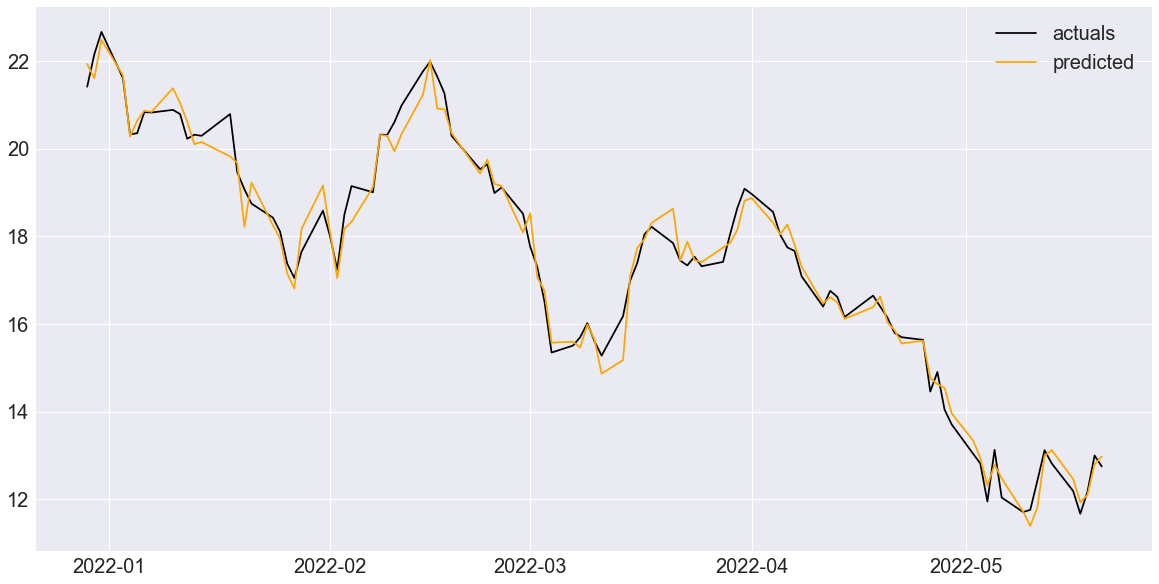

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['gtbif_next_close'], color='black')
ax.plot(y_test1['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## GTBIF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_gtbif, df_etfs_dow, on='Date', how='left')
df2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000               NaN      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   NaN  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   NaN  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   NaN  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   NaN  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   NaN  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.085   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.115   7.940000   8.030000   7.605000   7.620000   
2022-05-19                 0.022   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.013   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            gtbif_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-06-14                  True    False    False   False     False   
2018-06-15                  True    False    False   False     False   
2018-06-18                  True    False    False   False     False   
2018-06-19                  True    False    False   False     False   
2018-06-20                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   0.0  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   0.0  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   0.0  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   0.0  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   0.0  31.000000  31.000000  30.318001  30.920000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-06-14     195500      30.299999      29.990000 -0.090000   -0.002970   
2018-06-15     167900      30.209999      30.059999 -0.219999   -0.007282   
2018-06-18      79500      29.990000      30.209999  0.069999    0.002334   
2018-06-19     147400      30.059999      30.920000  0.150000    0.004990   
2018-06-20     262700      30.209999      31.719999  0.710001    0.023502   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-06-14          30.697999            -0.312           30.832999   
2018-06-15          30.395999            -0.302           30.877000   
2018-06-18          30.197999            -0.198           30.868000   
2018-06-19          30.153999            -0.044           30.777999   
2018-06-20          30.277999             0.124           30.643999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-06-14              0.040        0.0        0.0       0.0         0.0   
2018-06-15              0.044        0.0        0.0       0.0         0.0   
2018-06-18             -0.009        0.0        0.0       0.0         0.0   
2018-06-19             -0.090        0.0        0.0       0.0         0.0   
2018-06-20             -0.134        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-06-14          0.0              0.0              0.0        0.0   
2018-06-15          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-17      12.690      13.160     12.190       12.190        282300   
2022-05-18      11.750      12.350     11.300       11.670        343200   
2022-05-19      11.274      12.182     11.274       12.170        190600   
2022-05-20      12.250      13.000     11.600       13.000        207300   
2022-05-23      12.830      13.140     12.500       12.750        121800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-17            12.820            11.670      -0.630      -0.049142   
2022-05-18            12.190            12.170      -0.520      -0.042658   
2022-05-19            11.670            13.000       0.500       0.042845   
2022-05-20            12.170            12.750       0.830       0.068200   
2022-05-23            13.000             0.000      -0.250      -0.019231   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                0.000                  0.000   
2018-06-15                0.0000                0.000                  0.000   
2018-06-18                0.0000                0.000                  0.000   
2018-06-19                0.0000                0.000                  0.000   
2018-06-20                8.9026                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-17               12.4640                0.096                 12.397   
2022-05-18               12.4460               -0.018                 12.282   
2022-05-19               12.3940               -0.052                 12.304   
2022-05-20               12.3700               -0.024                 12.291   
2022-05-23               12.3560               -0.014                 12.362   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                 0.000  30.379999  30.580000  30.051001  30.209999   
2018-06-15                 0.000  30.010000  30.330000  29.700001  29.990000   
2018-06-18                 0.000  29.950001  30.139999  29.761999  30.059999   
2018-06-19                 0.000  29.920000  30.389999  29.830000  30.209999   
2018-06-20                 0.000  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-17                -0.085   7.990000   8.170000   7.880000   8.100000   
2022-05-18                -0.115   7.940000   8.030000   7.605000   7.620000   
2022-05-19                 0.022   7.560000   7.860000   7.540000   7.780000   
2022-05-20                -0.013   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2      12.690      13.160     12.190   
2022-05-18      5   18  2022        2      11.750      12.350     11.300   
2022-05-19      5   19  2022        2      11.274      12.182     11.274   
2022-05-20      5   20  2022        2      12.250      13.000     11.600   
2022-05-23      5   23  2022        2      12.830      13.140     12.500   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   
...                 ...           ...               ...               ...   
2022-05-17       12.190        282300            12.820            11.670   
2022-05-18       11.670        343200            12.190            12.170   
2022-05-19       12.170        190600            11.670            13.000   
2022-05-20       13.000        207300            12.170            12.750   
2022-05-23       12.750        121800            13.000             0.000   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   
...                ...            ...                   ...   
2022-05-17      -0.630      -0.049142               12.4640   
2022-05-18      -0.520      -0.042658               12.4460   
2022-05-19       0.500       0.042845               12.3940   
2022-05-20       0.830       0.068200               12.3700   
2022-05-23      -0.250      -0.019231               12.3560   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14                0.000                  0.000                 0.000   
2018-06-15                0.000                  0.000                 0.000   
2018-06-18                0.000                  0.000                 0.000   
2018-06-19                0.000                  0.000                 0.000   
2018-06-20                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-17                0.096                 12.397                -0.085   
2022-05-18               -0.018                 12.282                -0.115   
2022-05-19               -0.052                 12.304                 0.022   
2022-05-20               -0.024                 12.291                -0.013   
2022-05-23               -0.014                 12.362                 0.071   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-06-14  30.379999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

892

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

892
100


In [82]:
X_train2 = train2.drop('gtbif_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-06-14                    0.0                   0.0  30.379999  30.580000   
2018-06-15                    0.0                   0.0  30.010000  30.330000   
2018-06-18                    0.0                   0.0  29.950001  30.139999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-06-14  30.051001  30.209999     195500      30.299999      29.990000   
2018-06-15  29.700001  29.990000     167900      30.209999      30.059999   
2018-06-18  29.761999  30.059999      79500      29.990000      30.209999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-06-14 -0.090000   -0.002970          30.697999            -0.312   
2018-06-15 -0.219999   -0.007282          30.395999            -0.302   
2018-06-18  0.069999    0.002334          30.197999            -0.198   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-06-14           30.832999              0.040        0.0        0.0   
2018-06-15           30.877000              0.044        0.0        0.0   
2018-06-18           30.868000             -0.009        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-06-14       0.0         0.0          0.0              0.0   
2018-06-15       0.0         0.0          0.0              0.0   
2018-06-18       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-06-14              0.0        0.0           0.0                  0.0   
2018-06-15              0.0        0.0           0.0                  0.0   
2018-06-18              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-06-14                 0.0                   0.0                  0.0   
2018-06-15                 0.0                   0.0                  0.0   
2018-06-18                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-06-14        0.0        0.0       0.0         0.0          0.0   
2018-06-15        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(892, 185)

In [84]:
y_train2 = train2['gtbif_next_close']
y_train2.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('gtbif_next_close', axis=1)
y_test2 = test2['gtbif_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-29     12   29  2021        4       20.75   21.330000  19.410000   
2021-12-30     12   30  2021        4       21.25   22.207001  20.110001   
2021-12-31     12   31  2021        4       21.41   22.987000  21.020000   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-29        21.25        452300         19.889999    1.360001   
2021-12-30        21.42        383800         21.250000    0.170000   
2021-12-31        22.16        313900         21.420000    0.740000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-29       0.068376                20.308                0.536   
2021-12-30       0.008000                20.674                0.366   
2021-12-31       0.034547                21.012                0.338   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-29                 19.708                 0.127    11.25    11.34   
2021-12-30                 19.872                 0.164    11.08    11.45   
2021-12-31                 20.147                 0.275    11.13    11.38   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-29   11.04     11.05    1646800          11.28          11.21   
2021-12-30   11.06     11.21    1813000          11.05          11.08   
2021-12-31   11.07     11.08    1386300          11.21          11.43   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-29    -0.23   -0.020390             11.434            -0.088   
2021-12-30     0.16    0.014480             11.386            -0.048   
2021-12-31    -0.13   -0.011597             11.246            -0.140   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-29              11.374             -0.015  24.799999  25.190001   
2021-12-30              11.365             -0.009  25.010000  25.760000   
2021-12-31              11.351             -0.014  25.500000  25.650000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-29  24.219999   25.040001    1932500.0        24.700001   
2021-12-30  24.990000   25.469999    1395900.0        25.040001   
2021-12-31  25.139999   25.590000    1376000.0        25.469999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-29        25.469999   0.340000      0.013765            24.990001   
2021-12-30        25.590000   0.429998      0.017172            25.172001   
2021-12-31        25.790001   0.120001      0.004711            25.218000   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-29               0.286             24.457001                0.062   
2021-12-30               0.182             24.551000                0.094   
2021-12-31               0.046             24.699000                0.148   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-29      12.80      12.94    12.690       12.88     347000.0   
2021-12-30      12.84      13.20    12.804       12.99     180000.0   
2021-12-31      13.08      13.14 

In [88]:
X_test2.shape

(100, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([21.96376237, 21.70664675, 22.59402338, 21.69999097, 20.22181193])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.3551540204139976


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.27353726876503304


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['gtbif_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['gtbif_next_close'])

In [95]:
y_test2['gtbif_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              12.487819
2022-05-17             11.67              11.791744
2022-05-18             12.17              12.123882
2022-05-19             13.00              12.816689
2022-05-20             12.75              13.132380

In [97]:
hyper_table.append(dict(stock='gtbif', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['gtbif_next_close'][-1],
                        predicted_price=y_test2['gtbif_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

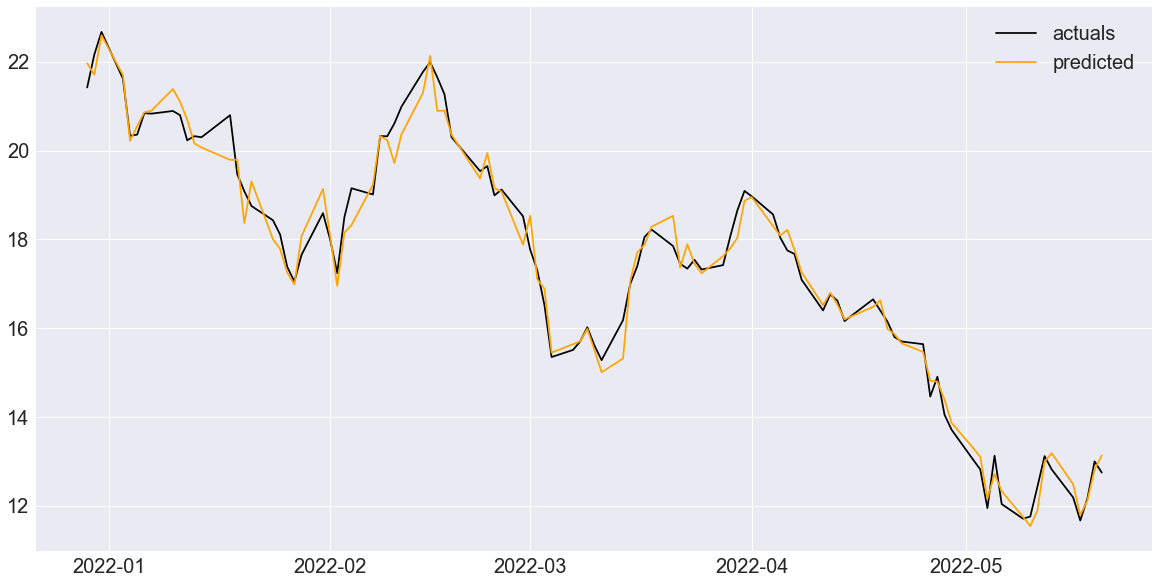

In [231]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['gtbif_next_close'], color='black')
ax.plot(y_test2['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112       0.000        0.00   
2018-06-15               30.268               0.075       0.000        0.00   
2018-06-18               30.286               0.018       0.000        0.00   
2018-06-19               30.432               0.146       0.000        0.00   
2018-06-20               30.699               0.267       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

892

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

892
100


In [112]:
X_train3 = train3.drop('gtbif_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [113]:
X_train3.shape

(892, 263)

In [114]:
y_train3 = train3['gtbif_next_close']
y_train3.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('gtbif_next_close', axis=1)
y_test3 = test3['gtbif_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-29     12   29  2021        4      9.00     9.180    8.720       8.76   
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-29        0.11       0.016923                 6.606   
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   
2021-12-31               0.0060                 6.5469                -0.020   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-29               -0.023        8.50       8.750       8.12   
2021-12-30               -0.010        8.00       8.750       

In [118]:
X_test3.shape

(100, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([21.44728293, 21.02000722, 21.83709974, 21.57663159, 20.89222256])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.7674103434060583


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.6721943952120776


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['gtbif_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['gtbif_next_close'])

In [125]:
y_test3['gtbif_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              13.440866
2022-05-17             11.67              12.820435
2022-05-18             12.17              12.633627
2022-05-19             13.00              13.587256
2022-05-20             12.75              13.519852

In [127]:
hyper_table.append(dict(stock='gtbif', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['gtbif_next_close'][-1],
                        predicted_price=y_test3['gtbif_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

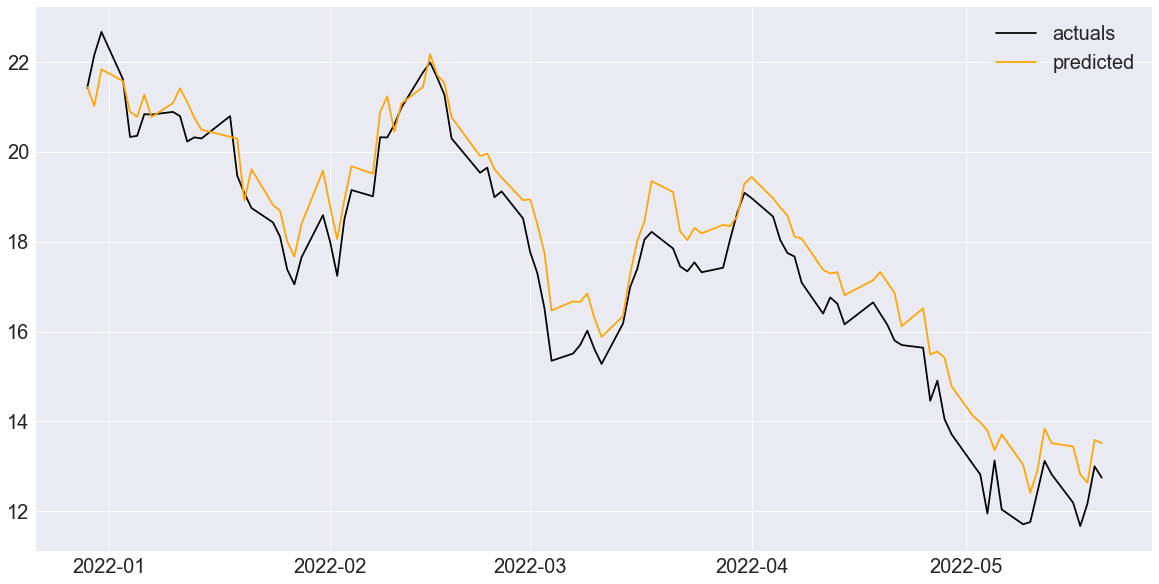

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['gtbif_next_close'], color='black')
ax.plot(y_test3['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112       0.000        0.00   
2018-06-15               30.268               0.075       0.000        0.00   
2018-06-18               30.286               0.018       0.000        0.00   
2018-06-19               30.432               0.146       0.000        0.00   
2018-06-20               30.699               0.267       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

892

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

892
100


In [142]:
X_train4 = train4.drop('gtbif_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [143]:
X_train4.shape

(892, 289)

In [144]:
y_train4 = train4['gtbif_next_close']
y_train4.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('gtbif_next_close', axis=1)
y_test4 = test4['gtbif_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-29     12   29  2021        4      9.00     9.180    8.720       8.76   
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-29        0.11       0.016923                 6.606   
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   
2021-12-31               0.0060                 6.5469                -0.020   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-29               -0.023        8.50       8.750       8.12   
2021-12-30               -0.010        8.00       8.750       

In [148]:
X_test4.shape

(100, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([21.48849965, 21.09753927, 21.87654742, 21.5859676 , 20.96762597])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.8595620943187585


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.7653427323788151


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['gtbif_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['gtbif_next_close'])

In [155]:
y_test4['gtbif_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              13.640997
2022-05-17             11.67              13.025818
2022-05-18             12.17              12.820303
2022-05-19             13.00              13.657441
2022-05-20             12.75              13.730300

In [157]:
hyper_table.append(dict(stock='gtbif', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['gtbif_next_close'][-1],
                        predicted_price=y_test4['gtbif_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

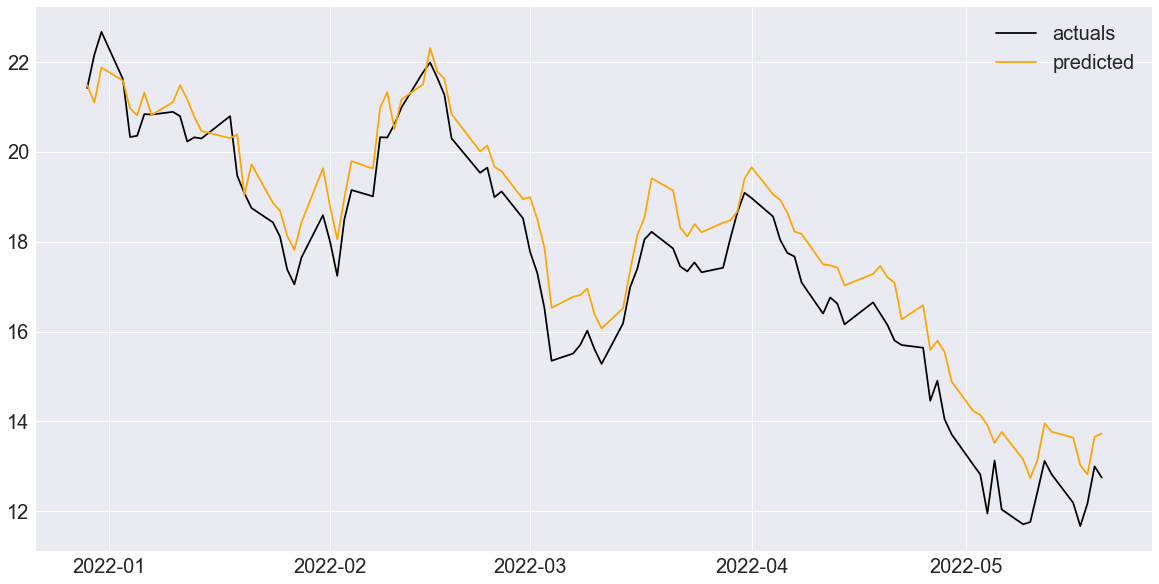

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['gtbif_next_close'], color='black')
ax.plot(y_test4['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112       0.000        0.00   
2018-06-15               30.268               0.075       0.000        0.00   
2018-06-18               30.286               0.018       0.000        0.00   
2018-06-19               30.432               0.146       0.000        0.00   
2018-06-20               30.699               0.267       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

892

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

892
100


In [172]:
X_train5 = train5.drop('gtbif_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [173]:
X_train5.shape

(892, 393)

In [174]:
y_train5 = train5['gtbif_next_close']
y_train5.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('gtbif_next_close', axis=1)
y_test5 = test5['gtbif_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-29     12   29  2021        4      9.00     9.180    8.720       8.76   
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-29        0.11       0.016923                 6.606   
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   
2021-12-31               0.0060                 6.5469                -0.020   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-29               -0.023        8.50       8.750       8.12   
2021-12-30               -0.010        8.00       8.750       

In [178]:
X_test5.shape

(100, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([21.41945006, 21.36114348, 21.79141454, 21.43777917, 20.54586093])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.7643707147763145


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.6594839772787708


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['gtbif_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['gtbif_next_close'])

In [185]:
y_test5['gtbif_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              13.326065
2022-05-17             11.67              13.038209
2022-05-18             12.17              12.958805
2022-05-19             13.00              13.977762
2022-05-20             12.75              13.780188

In [187]:
hyper_table.append(dict(stock='gtbif', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['gtbif_next_close'][-1],
                        predicted_price=y_test5['gtbif_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

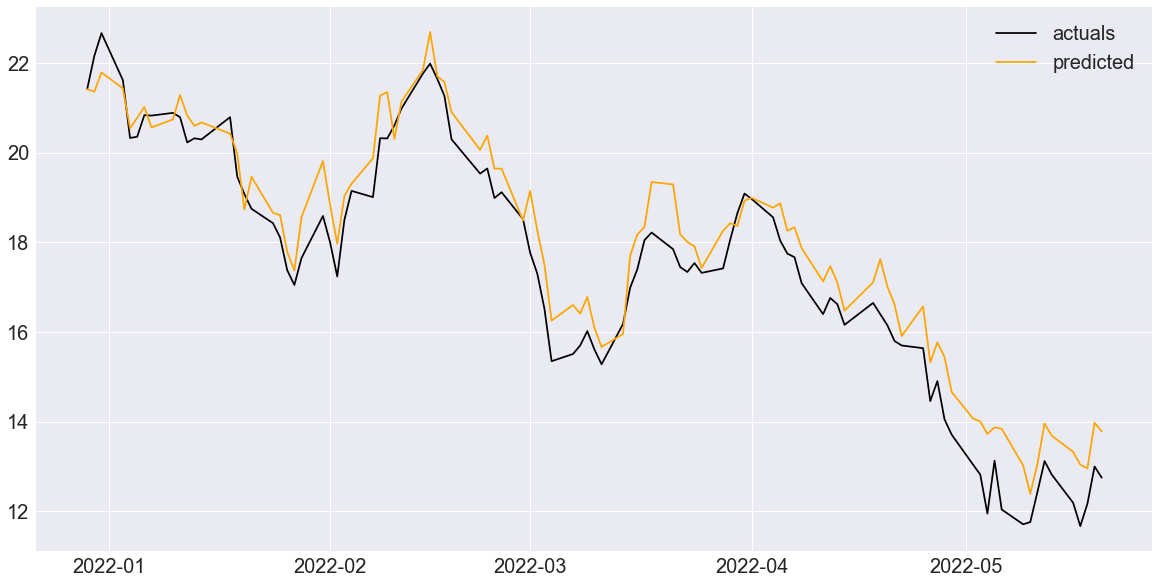

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['gtbif_next_close'], color='black')
ax.plot(y_test5['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-17     0.027923               5.578              0.090   
2022-05-18    -0.050934               5.700              0.122   
2022-05-19     0.050089               5.800              0.100   
2022-05-20    -0.059625               5.720             -0.080   
2022-05-23    -0.059783               5.612             -0.108   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112       0.000        0.00   
2018-06-15               30.268               0.075       0.000        0.00   
2018-06-18               30.286               0.018       0.000        0.00   
2018-06-19               30.432               0.146       0.000        0.00   
2018-06-20               30.699               0.267       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17                5.759              -0.017       3.973        4.10   
2022-05-18                5.651              -0.108       3.990        4.07   
2022-05-19                5.631              -0.020       3.990        4.03   
2022-05-20                5.586              -0.045       3.990        4.20   
2022-05-23                5.550              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

892

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

892
100


In [202]:
X_train6 = train6.drop('gtbif_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [203]:
X_train6.shape

(892, 419)

In [204]:
y_train6 = train6['gtbif_next_close']
y_train6.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-23    20.340000
2021-12-27    19.889999
2021-12-28    21.250000
Name: gtbif_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('gtbif_next_close', axis=1)
y_test6 = test6['gtbif_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-29     12   29  2021        4      9.00     9.180    8.720       8.76   
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-29        0.11       0.016923                 6.606   
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   
2021-12-31               0.0060                 6.5469                -0.020   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-29               -0.023        8.50       8.750       8.12   
2021-12-30               -0.010        8.00       8.750       

In [208]:
X_test6.shape

(100, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    12.17
2022-05-19    13.00
2022-05-20    12.75
Name: gtbif_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([21.43751912, 21.39943021, 21.82191435, 21.57743232, 20.75012679])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.7910147110692191


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.6899409129739718


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['gtbif_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['gtbif_next_close'])

In [215]:
y_test6['gtbif_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-16             12.19              13.431899
2022-05-17             11.67              12.959421
2022-05-18             12.17              12.937979
2022-05-19             13.00              13.923783
2022-05-20             12.75              13.779297

In [217]:
hyper_table.append(dict(stock='gtbif', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['gtbif_next_close'][-1],
                        predicted_price=y_test6['gtbif_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

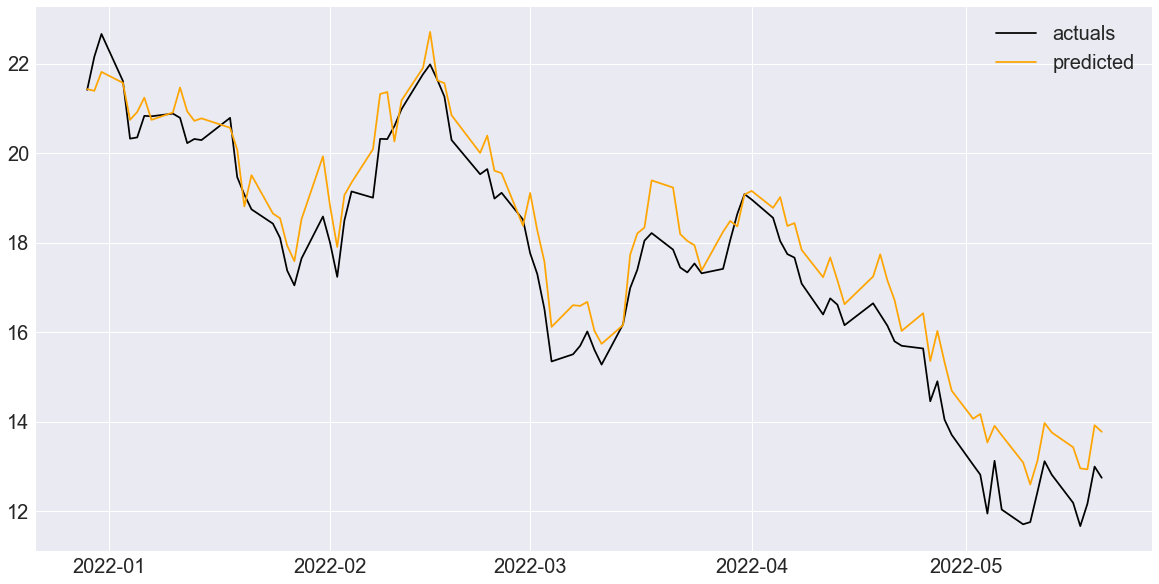

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['gtbif_next_close'], color='black')
ax.plot(y_test6['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
2  gtbif    1+ETFs+Dow  LinearRegression()  0.355154  0.273537         12.75   
1  gtbif        1+ETFs  LinearRegression()  0.358669  0.276314         12.75   
0  gtbif         1+Dow  LinearRegression()  0.564714  0.454982         12.75   
5  gtbif      All+ETFs  LinearRegression()  0.764371  0.659484         12.75   
3  gtbif    All stocks  LinearRegression()  0.767410  0.672194         12.75   
6  gtbif  All+ETFs+Dow  LinearRegression()  0.791015  0.689941         12.75   
4  gtbif       All+Dow  LinearRegression()  0.859562  0.765343         12.75   

   predicted_price  rows  train_rows  test_rows  columns  
2        13.132380   992         892        100      186  
1        12.978798   992         892        100      160  
0        13.388784   992         892        100       56  
5        13.780188   992         892        100      394  
3        13.519852   992         892        100      264  
6        13.779297   992         892        100      420  
4        13.730300   992         892        100      290

In [220]:
hyper_table_gtbif = hyper_table.head(1)
hyper_table_gtbif

stock     version               model      rmse       mae  actual_price  \
2  gtbif  1+ETFs+Dow  LinearRegression()  0.355154  0.273537         12.75   

   predicted_price  rows  train_rows  test_rows  columns  
2         13.13238   992         892        100      186

In [221]:
hyper_table_gtbif.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_gtbif.csv', index=True)

## Simulation - Sell

In [222]:
gtbif_sim = df2[n:]
gtbif_sim = gtbif_sim[['gtbif_Open', 'gtbif_Close']]
gtbif_sim.head()

gtbif_Open  gtbif_Close
Date                               
2021-12-29       20.75    21.250000
2021-12-30       21.25    21.420000
2021-12-31       21.41    22.160000
2022-01-03       22.42    22.670000
2022-01-04       22.67    21.620001

In [223]:
gtbif_sim.shape

(100, 2)

In [224]:
gtbif_sim.tail()

gtbif_Open  gtbif_Close
Date                               
2022-05-16      13.000        12.82
2022-05-17      12.690        12.19
2022-05-18      11.750        11.67
2022-05-19      11.274        12.17
2022-05-20      12.250        13.00

In [225]:
gtbif_sim['gtbif_Pred_Close'] = y_pred2
gtbif_sim.head()

gtbif_Open  gtbif_Close  gtbif_Pred_Close
Date                                                 
2021-12-29       20.75    21.250000         21.963762
2021-12-30       21.25    21.420000         21.706647
2021-12-31       21.41    22.160000         22.594023
2022-01-03       22.42    22.670000         21.699991
2022-01-04       22.67    21.620001         20.221812

In [226]:
gtbif_sim['Trade'] = gtbif_sim['gtbif_Pred_Close'] > gtbif_sim['gtbif_Open']
gtbif_sim.head()

gtbif_Open  gtbif_Close  gtbif_Pred_Close  Trade
Date                                                        
2021-12-29       20.75    21.250000         21.963762   True
2021-12-30       21.25    21.420000         21.706647   True
2021-12-31       21.41    22.160000         22.594023   True
2022-01-03       22.42    22.670000         21.699991  False
2022-01-04       22.67    21.620001         20.221812  False

In [227]:
gtbif_sim = gtbif_sim[gtbif_sim['Trade']==True]
gtbif_sim.head()

gtbif_Open  gtbif_Close  gtbif_Pred_Close  Trade
Date                                                        
2021-12-29   20.750000       21.250         21.963762   True
2021-12-30   21.250000       21.420         21.706647   True
2021-12-31   21.410000       22.160         22.594023   True
2022-01-06   20.000000       20.358         20.859797   True
2022-01-07   19.610001       20.840         20.898127   True

In [228]:
gtbif_sim['Gains'] = (gtbif_sim['gtbif_Close'] - gtbif_sim['gtbif_Open'])*100
gtbif_sim.head()

gtbif_Open  gtbif_Close  gtbif_Pred_Close  Trade     Gains
Date                                                                  
2021-12-29   20.750000       21.250         21.963762   True   50.0000
2021-12-30   21.250000       21.420         21.706647   True   17.0000
2021-12-31   21.410000       22.160         22.594023   True   75.0000
2022-01-06   20.000000       20.358         20.859797   True   35.8000
2022-01-07   19.610001       20.840         20.898127   True  122.9999

In [229]:
total_gains = gtbif_sim['Gains'].sum()
print(round(total_gains, 2))

2702.5
